In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

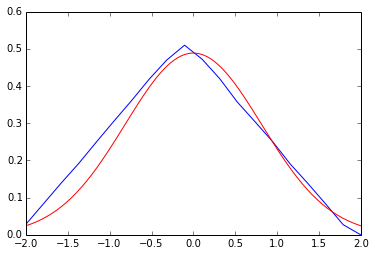

In [2]:
M = 200000
N = 2
x_matrix = 2*np.random.sample((M,N)) - 1
# print x_matrix

z_vals = np.sum(x_matrix, axis=1)
# print z_vals

K = 10.0
grid = np.linspace(-N,N,K*N)
count = np.zeros(np.size(grid))
for idx in xrange(0,np.size(grid) - 1):
    lb = grid[idx]
    ub = grid[idx + 1]
    count[idx] = np.size(np.where((z_vals > lb) & (z_vals < ub)))/(1.0*M)*K/2.0
    
var = N/3.0
scale = np.sqrt(var)
fine_grid = np.linspace(-N,N,100*N)
pdf_points = norm.pdf(fine_grid,scale=scale)
plt.plot(grid,count)
# print np.shape(pdf_points)
plt.plot(fine_grid,pdf_points,color='r')
plt.show()


(10000, 2)
(20000, 4)
(4, 4)
(20000,)
[ 0.9100568   0.00466178  0.00628975  0.00119989]
[[ 0.9100568   0.00466178]
 [ 0.00628975  0.00119989]]


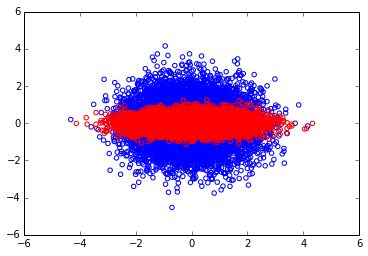

In [3]:
B = np.array([[1,0],[0,0]])
N = 10000
Sigma_x = np.eye(2)
mu_x = np.zeros(2)
sigma_squared = 0.1
X = np.random.multivariate_normal(mu_x,Sigma_x, size=N)
eta_1 = np.random.multivariate_normal(mu_x,sigma_squared*np.eye(2), size=N)
eta_2 = np.random.multivariate_normal(mu_x,sigma_squared*np.eye(2), size=N)
y_1 = X + eta_1
y_2 = np.dot(X,np.transpose(B)) + eta_2


plt.scatter(y_1[:,0],y_1[:,1],color='b', marker='o',facecolors='none')
plt.scatter(y_2[:,0],y_2[:,1],color='r', marker='o',facecolors='none')

# need to construct the H matrix
H = np.zeros((2*N,4))

y_1_stack = np.reshape(y_1,(2*N,))
y_2_stack = np.reshape(y_2,(2*N,))


print np.shape(y_1)
H = np.zeros((2*N,4))
for i in xrange(0,N):
    idx = 2*i;
    H[idx,0:2] = y_1[i,:]
    H[idx+1,2:4] = y_1[i,:]


print np.shape(H)
A = np.linalg.inv(np.dot(H.transpose(), H))
print np.shape(A)
print np.shape(y_2_stack)
b = np.dot(np.dot(A,H.transpose()),y_2_stack)
print b
B = np.reshape(b,(2,2))
print B

In [4]:
print norm(1)

In [5]:
a = np.array([[1,2],[3,4],[5,6]])
print a
print np.reshape(a,(6,))

[[1 2]
 [3 4]
 [5 6]]
[1 2 3 4 5 6]


In [6]:
a = np.array([1,2,3,4])
b = np.reshape(a,(2,2))
print b

[[1 2]
 [3 4]]
